In [2]:
import pandas as pd
import numpy as np
import os

Обзоры на приложения в Google Play Store
https://www.kaggle.com/gauthamp10/google-playstore-apps 
Подготовьте список самых популярных приложений по категориям
Какие приложения самые дорогие (и категории)
Какие категории содержат самое большое количество приложений без отзывов

In [3]:
df = pd.read_csv('archive.zip')

In [4]:
df.Price[df.Price > 0.0]

273        1.99
296        4.99
417        0.99
554        2.99
618        0.99
           ... 
2312658    1.99
2312686    1.49
2312703    7.99
2312803    0.99
2312927    2.49
Name: Price, Length: 44933, dtype: float64

In [5]:
df.shape

(2312944, 24)

In [6]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [7]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [8]:
print("Количстево категорий ", df.Category.unique().shape[0])
print("Количстево приложений ", df['App Id'].unique().shape[0])

Количстево категорий  48
Количстево приложений  2312944


In [9]:
# удаляем дубликаты если есть
df.drop_duplicates(inplace=True)

In [10]:
# где и сколько nan 
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [11]:
df_Cat_id = df.groupby(['Category'])['Maximum Installs'].transform(max) == df['Maximum Installs']

### Список самых популярных приложений по категориям


In [12]:
df[df_Cat_id][['App Name', 'Category']]

,App Name,Category
90015,Pinterest,Lifestyle
188437,Samsung Health,Health & Fitness
244319,Garena Free Fire - Rampage,Action
267197,Google Pay: A safe & helpful way to manage money,Finance
286345,Candy Crush Saga,Casual
336867,Toca Kitchen 2,Educational
396670,"Ticketmaster－Buy, Sell Tickets to Concerts, Sp...",Events
423997,Clash of Clans,Strategy
440410,Magic Tiles 3,Music
491352,"Google Play Books - Ebooks, Audiobooks, and Co...",Books & Reference


In [13]:
df[df_Cat_id]['App Name'].unique().shape

(48,)

In [14]:
df.Category.unique().shape

(48,)

In [15]:
#article_read[article_read.country == 'country_2'].groupby(['source', 'topic']).count()
df4 = df[df['Maximum Installs'] == df['Maximum Installs'].max()].groupby(['Category','App Name'], as_index=False).first()
df4.head()

,Category,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Tools,Google Play services,com.google.android.gms,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


In [16]:
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### Список валюты

In [17]:
df.Currency.unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [18]:
df_Price = df[['Price','Currency']]
df_Price.shape

(2312944, 2)

In [19]:
#Убираем бесплатные приложения, и какая валюта осталась. Проверка нужно ли делать конверт валют
df.loc[df_Price.Price > 0.0]['Currency'].unique()

array(['USD'], dtype=object)

In [20]:
# Убираем бесплатные приложения и приложения которые никто не устанавливал
df_price_AppName = df.loc[(df.Price > 0.0) & (df['Maximum Installs'] > 0)].nlargest(20, ['Price'])

### Список топ 20 дорогих приложений

In [21]:
df_price_AppName[['App Name','Price']]

,App Name,Price
544468,MESH Connect,400.00
644212,Challenge Impossible Ball for you,399.99
789532,Acid Reflux Treatment,399.99
817106,Most Expensive Clicker,399.99
829385,Premium Luxury Watches - Luxury Watches Brands,399.99
921941,Luxsure,399.99
1399820,Most expensive word game,399.99
1444845,Plasma duct - Premium Game,399.99
1580432,Baby Nightmares,399.99
1638663,Точки интереса,399.99


In [22]:
#Убираем бесплатные приложения, и которые никто не скачивал
df_price_cat = df.loc[(df.Price > 0.0) & (df['Maximum Installs'] > 0)]
df_price_cat_result = df_price_cat.groupby(['Category'])['Price'].max()

### Список дорогих категорий

In [23]:
df_price_cat_result.sort_values(ascending = False)

Category
Productivity               400.00
Music & Audio              399.99
Shopping                   399.99
Health & Fitness           399.99
Board                      399.99
Maps & Navigation          399.99
Arcade                     399.99
Puzzle                     399.99
Dating                     399.99
Entertainment              399.99
Casual                     399.99
Tools                      394.99
Lifestyle                  389.99
Simulation                 379.99
Social                     379.99
Education                  364.99
Art & Design               354.99
Medical                    349.99
Books & Reference          339.99
Sports                     338.99
Business                   299.99
Auto & Vehicles            294.99
Educational                294.99
Personalization            279.99
Finance                    199.99
Photography                162.99
Food & Drink               149.99
Weather                    109.99
Video Players & Editors     99.99
Commu

In [24]:
df_Cat_Price = df_price_cat.groupby(['Category'])['Price'].transform(max) == df_price_cat['Price']

### Дорогие приложения по категориям

In [25]:
df_price_cat[df_Cat_Price][['App Name', 'Category','Price']].sort_values(by=['Category','Price'], ascending = [True,True])

,App Name,Category,Price
703985,INFESTED OLD - Horror Game,Action,59.99
387376,CHAOS;CHILD,Adventure,26.99
644212,Challenge Impossible Ball for you,Arcade,399.99
1580432,Baby Nightmares,Arcade,399.99
1637296,10.000 Moving Cities – Same but Different,Art & Design,354.99
1230669,REPUVE y mas... PRO,Auto & Vehicles,294.99
1207205,Golden Ratio Face - Beauty Analysis & Beauty Tips,Beauty,14.99
1399820,Most expensive word game,Board,399.99
1204038,研究社 英語大辞典セット,Books & Reference,339.99
1499476,BacaNotes,Business,299.99


### Список топ 10 категорий без отзывов

In [26]:
df_rating_zero = df.Category[df['Rating Count'] == 0.0].value_counts()

In [27]:
# где Rating Count = 0 или NAN 
df_rating_zero = df.Category[(df['Rating Count'].isnull()) | (df['Rating Count'] == 0.0)].value_counts()

In [28]:
df_rating_zero.sort_values(ascending = False).head(10)

Education            112832
Business              93272
Music & Audio         74723
Lifestyle             63106
Tools                 58938
Entertainment         54701
Food & Drink          51038
Health & Fitness      50128
Books & Reference     49689
Shopping              42442
Name: Category, dtype: int64

In [29]:
 import matplotlib.pyplot as plt

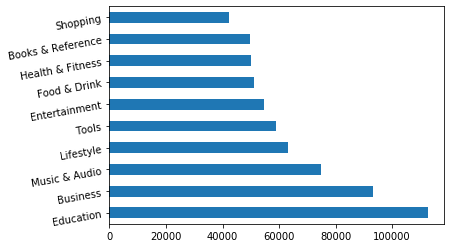

In [81]:
top = df_rating_zero.sort_values(ascending = False).head(10)
top.plot(kind="barh", rot=10,fontsize=10)

In [31]:
df_Education = df.loc[(df.Category == 'Education') & (df.Released.str.contains('2021'))]

In [32]:
df_Education.sort_values('Maximum Installs', ascending = False).head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1570124,Gauthmath - Students Must Have,com.education.android.h.intelligence,Education,4.3,6003.0,"1,000,000+",1000000.0,2332516,True,0.0,...,https://www.gauthmath.com,feedback@gauthmath.com,"Mar 31, 2021","Jun 10, 2021",Everyone,http://www.gauthmath.com/policy,False,False,False,2021-06-16 02:23:04
179067,KIDS Quiz GK,game.kidspop.gk.quiz.info,Education,4.4,8996.0,"1,000,000+",1000000.0,1523991,True,0.0,...,http://kidsgk.000webhostapp.com/,munniakumar@gmail.com,"Mar 30, 2021","Mar 30, 2021",Everyone,https://docs.google.com/document/d/1O6U1TnTT1O...,True,False,False,2021-06-15 23:19:50
845426,Guide for free Fire Tips 2021,com.profftriko.tipof,Education,3.6,4708.0,"1,000,000+",1000000.0,1215942,True,0.0,...,NaN,dreamsFreeFF@gmail.com,"Jan 21, 2021","Jan 22, 2021",Teen,https://sites.google.com/view/freetoo/inicio,True,False,False,2021-06-16 09:54:43
123221,Emergency Hospital Surgery Simulator: Doctor G...,com.taprix.er.emergency.hospital.surgery.simul...,Education,4.2,3324.0,"1,000,000+",1000000.0,1090905,True,0.0,...,http://picube.games/,taprix.developer@gmail.com,"Jan 7, 2021","May 07, 2021",Teen,https://taprix-games.blogspot.com/2020/11/tapr...,True,True,False,2021-06-15 22:20:41
830753,PlantIn: Plant Identification,com.myplantin.app,Education,4.5,12715.0,"1,000,000+",1000000.0,1024471,True,0.0,...,https://myplantin.com,support@plantin.xyz,"Mar 17, 2021","Jun 10, 2021",Everyone,https://legal.myplantin.com/vortemol/privacy_p...,False,True,False,2021-06-16 09:41:01
2172968,Blossom - Plant Identification app,com.conceptivapps.blossom,Education,4.0,10061.0,"500,000+",500000.0,991466,True,0.0,...,https://conceptivapps.com/blossom/index.html,support@conceptivapps.com,"Feb 15, 2021","Jun 10, 2021",Everyone,https://conceptivapps.com/privacy_policy.html,False,True,False,2021-06-16 10:57:01
1980590,Qconcursos,com.qconcursos.QCX,Education,4.5,10867.0,"500,000+",500000.0,693533,True,0.0,...,https://www.qconcursos.com/,support@qconcursoshelp.zendesk.com,"Mar 4, 2021","Jun 10, 2021",Everyone,https://www.qconcursos.com/politica-de-privaci...,False,False,False,2021-06-16 08:09:08
308197,Sago Mini Road Trip Adventure,com.sagosago.RoadTrip.Trial.googleplay,Education,3.9,841.0,"500,000+",500000.0,648130,True,0.0,...,http://www.sagomini.com,support@sagomini.com,"Jan 5, 2021","Jan 05, 2021",Everyone,http://www.sagomini.com/privacypolicy,True,True,False,2021-06-16 01:37:15
1552282,Easy English Dictionary Offline Voice Word Mea...,com.englishdictionary.offlinethesaurus.voicetr...,Education,4.1,2912.0,"500,000+",500000.0,617340,True,0.0,...,https://keyboardmania11.blogspot.com/,keyboardmania11@gmail.com,"Jan 30, 2021","May 25, 2021",Everyone,https://keyboardmania11.blogspot.com/2020/05/p...,True,True,False,2021-06-16 02:08:06
233837,Wulkanowy Dzienniczek,io.github.wulkanowy,Education,3.9,512.0,"500,000+",500000.0,541754,True,0.0,...,https://wulkanowy.github.io/,wulkanowyinc@gmail.com,"Feb 7, 2021","May 21, 2021",Everyone,https://wulkanowy.github.io/polityka-prywatnosci,False,False,False,2021-06-16 00:21:37


In [33]:
# Форматируем дату "Mar 4, 2021" на "2021"
df_time = pd.DatetimeIndex(df['Released']).year

### Кол-во выпущенных приложений по годам


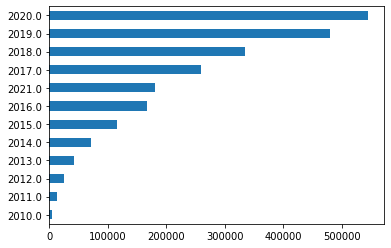

In [35]:
df_time.value_counts(ascending=True).plot(kind='barh')

In [38]:
df_duble = df.copy(deep=True)

In [39]:
df_duble['year'] = pd.DatetimeIndex(df_duble['Released']).year

In [42]:
df_category_year = df_duble.groupby(['Category'])['year'].value_counts(ascending=True)

In [121]:
top

Education            112832
Business              93272
Music & Audio         74723
Lifestyle             63106
Tools                 58938
Entertainment         54701
Food & Drink          51038
Health & Fitness      50128
Books & Reference     49689
Shopping              42442
Name: Category, dtype: int64

### Топ 10 категорий по кол-ву приложений

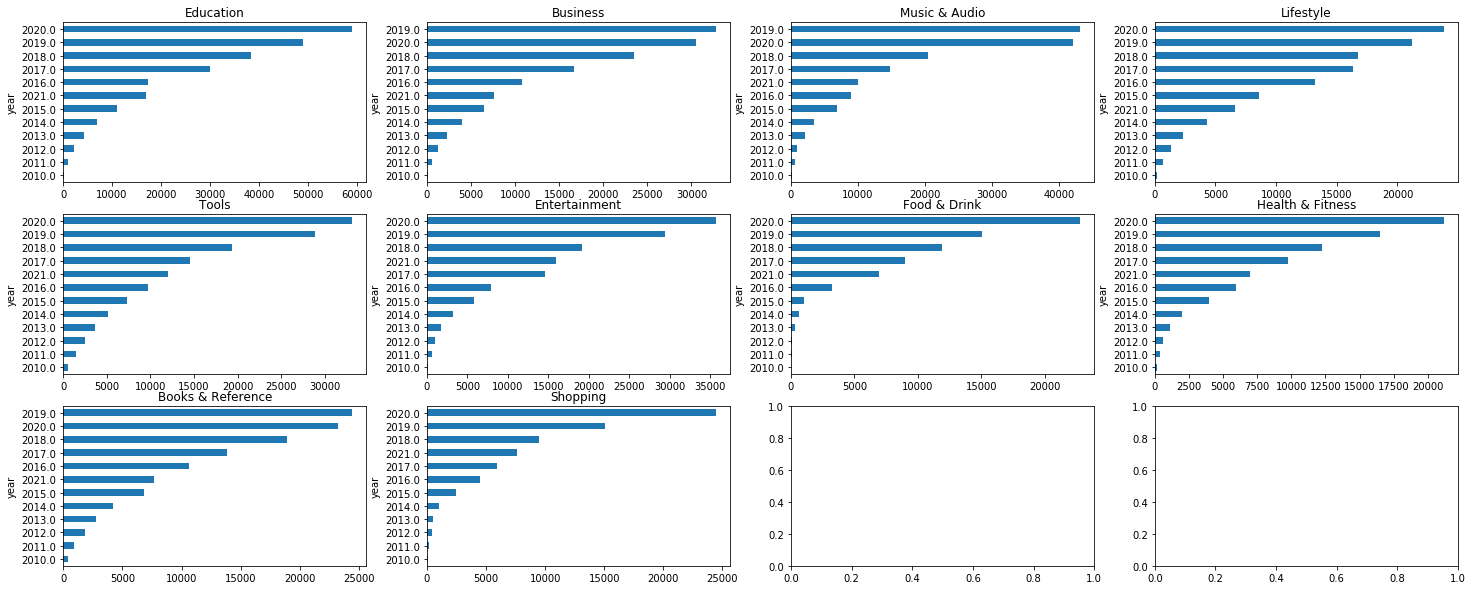

In [155]:
fig, axs = plt.subplots(3,4, figsize = (25,10))
df_category_year['Education'].plot(kind='barh', title = "Education", ax = axs[0,0])
df_category_year['Business'].plot(kind='barh', title="Business", ax = axs[0, 1])
df_category_year['Music & Audio'].plot(kind='barh', title="Music & Audio",ax = axs[0,2])
df_category_year['Lifestyle'].plot(kind='barh', title="Lifestyle", ax = axs[0,3])
df_category_year['Tools'].plot(kind='barh', title="Tools", ax = axs[1,0])
df_category_year['Entertainment'].plot(kind='barh', title="Entertainment", ax = axs[1,1])
df_category_year['Food & Drink'].plot(kind='barh', title="Food & Drink", ax = axs[1,2])
df_category_year['Health & Fitness'].plot(kind='barh', title="Health & Fitness", ax = axs[1,3])
df_category_year['Books & Reference'].plot(kind='barh', title="Books & Reference", ax = axs[2,0])
df_category_year['Shopping'].plot(kind='barh', title="Shopping", ax = axs[2,1])

### Количество приложений по годам в разных категориях

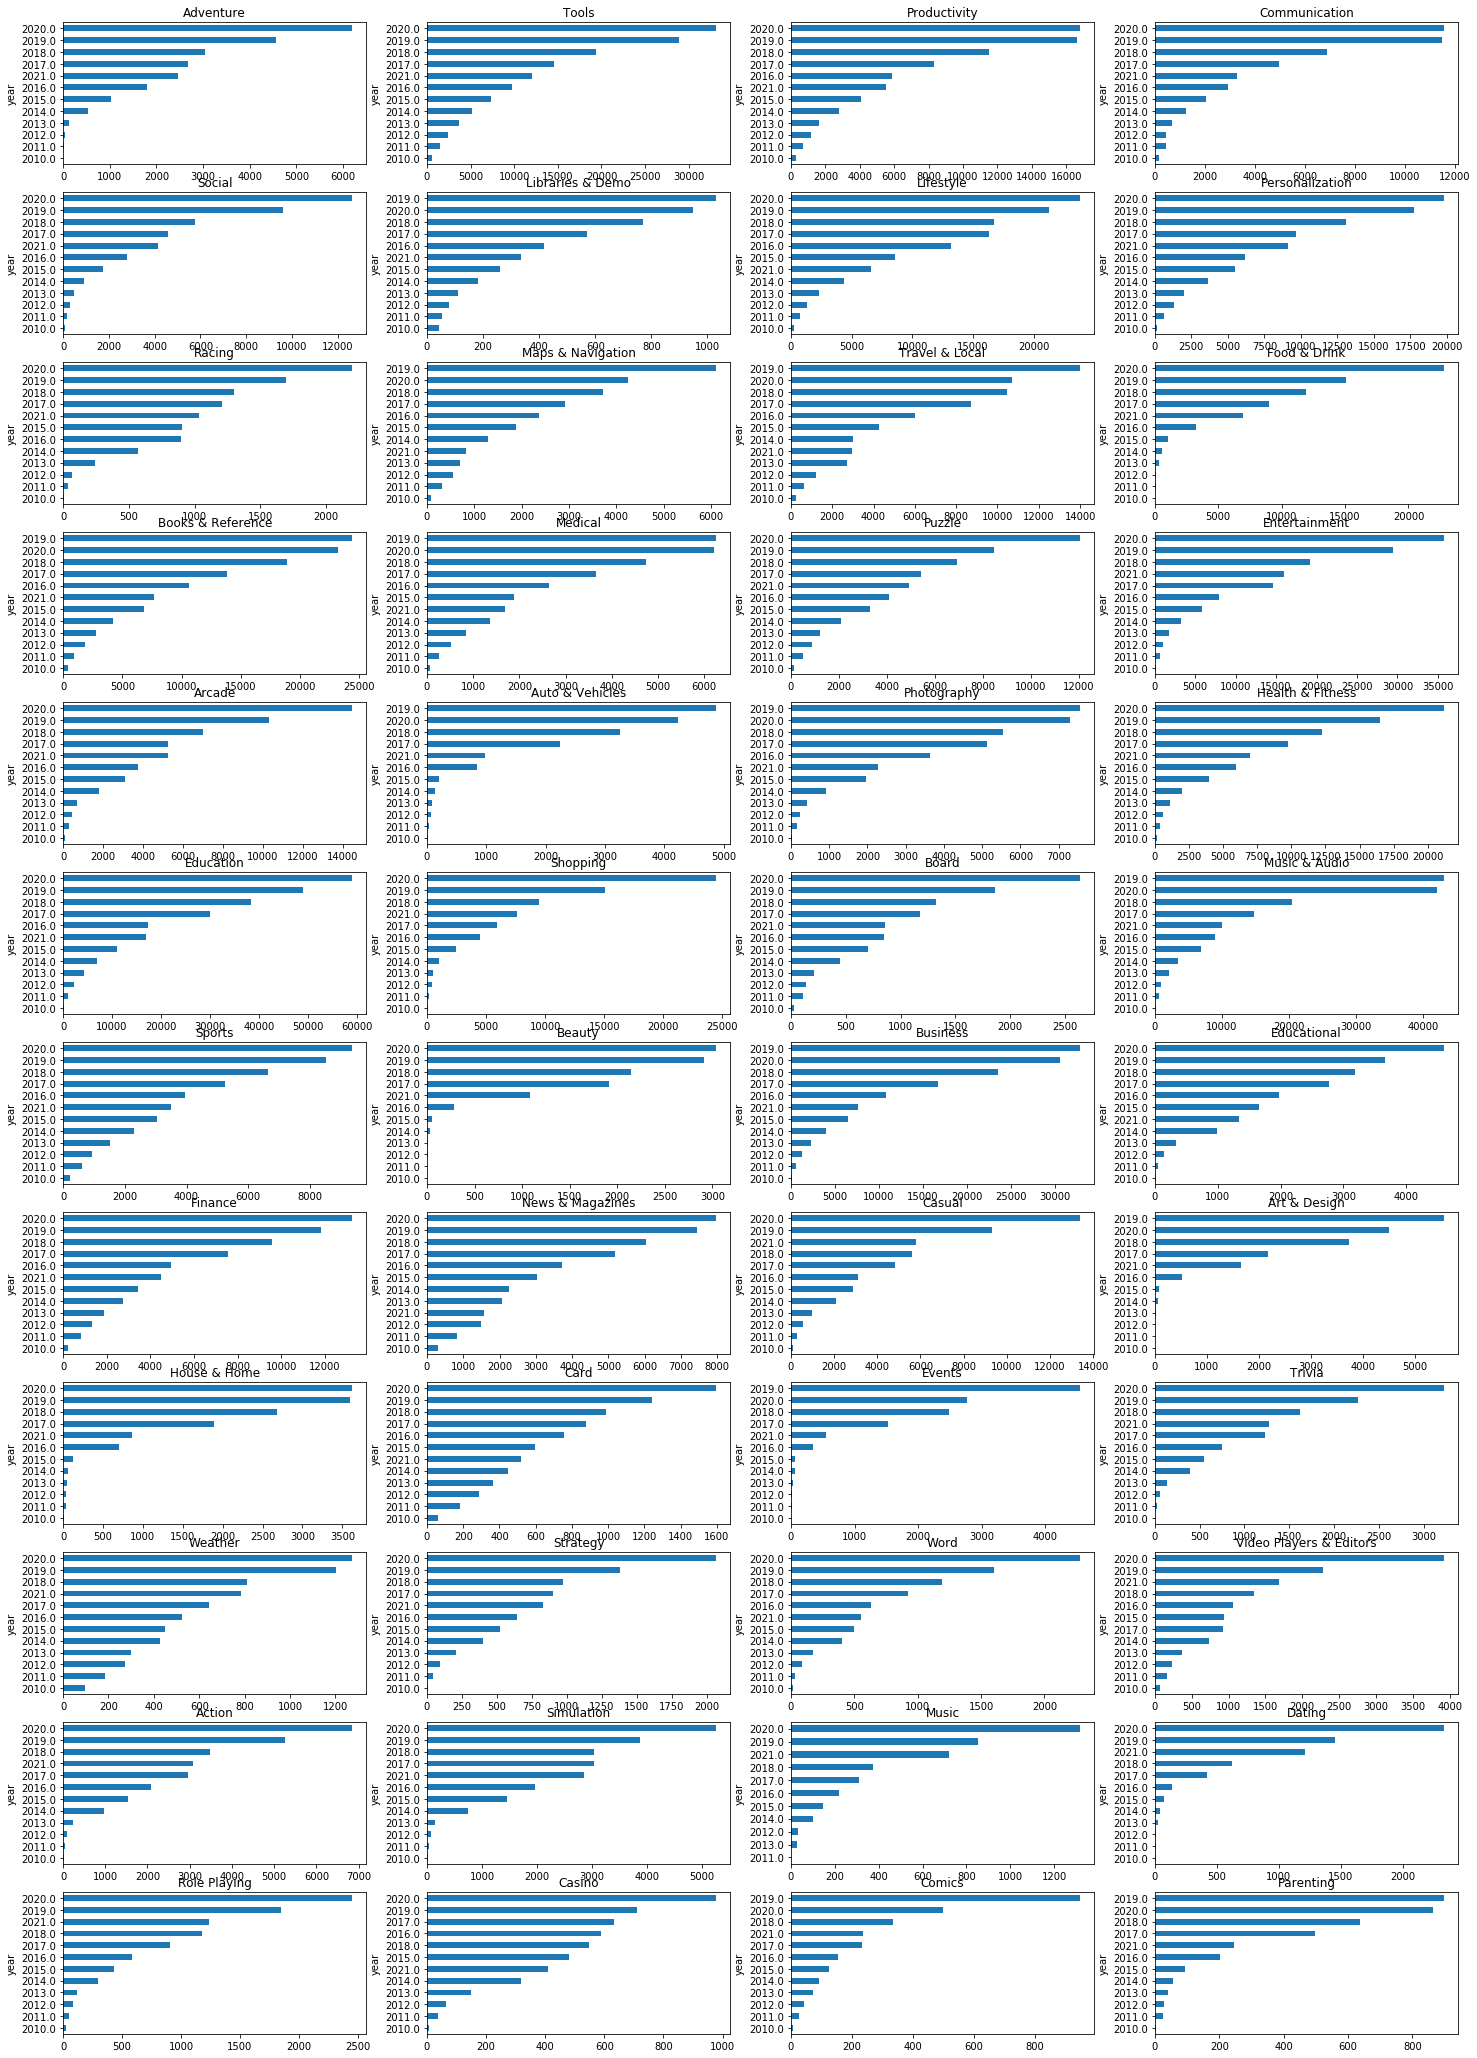

In [153]:
#Графики по количеству приложений в категорий по годом
# 12 - df.Category.unique().shape[0]/4
# 4 оптимальное количество графиков в строке
fig, axs = plt.subplots(12, 4, figsize = (25,37))
total_axes = 0 # строка
subplt = 0 # столбец
for x in df.Category.unique():
    df_category_year[x].plot(kind='barh', title = x, ax = axs[total_axes,subplt])
    subplt+=1
    if subplt == 4:
        subplt=0
        total_axes +=1 
